In [15]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("/home/harish/Documents/Python Scripts/IVP Lab/Assignment2/Lenna_color.png")
(x,y,z) = img.shape

In [16]:
def rgb2hsv(rgb):
    """ convert RGB to HSV color space

    :param rgb: np.ndarray
    :return: np.ndarray
    """

    rgb = rgb.astype('float')
    maxv = np.amax(rgb, axis=2)
    maxc = np.argmax(rgb, axis=2)
    minv = np.amin(rgb, axis=2)
    minc = np.argmin(rgb, axis=2)

    hsv = np.zeros(rgb.shape, dtype='float')
    hsv[maxc == minc, 0] = np.zeros(hsv[maxc == minc, 0].shape)
    hsv[maxc == 0, 0] = (((rgb[..., 1] - rgb[..., 2]) * 60.0 / (maxv - minv + np.spacing(1))) % 360.0)[maxc == 0]
    hsv[maxc == 1, 0] = (((rgb[..., 2] - rgb[..., 0]) * 60.0 / (maxv - minv + np.spacing(1))) + 120.0)[maxc == 1]
    hsv[maxc == 2, 0] = (((rgb[..., 0] - rgb[..., 1]) * 60.0 / (maxv - minv + np.spacing(1))) + 240.0)[maxc == 2]
    hsv[maxv == 0, 1] = np.zeros(hsv[maxv == 0, 1].shape)
    hsv[maxv != 0, 1] = (1 - minv / (maxv + np.spacing(1)))[maxv != 0]
    hsv[..., 2] = maxv

    return hsv

def hsv2rgb(hsv):
    """ convert HSV to RGB color space

    :param hsv: np.ndarray
    :return: np.ndarray
    """

    hi = np.floor(hsv[..., 0] / 60.0) % 6
    hi = hi.astype('uint8')
    v = hsv[..., 2].astype('float')
    f = (hsv[..., 0] / 60.0) - np.floor(hsv[..., 0] / 60.0)
    p = v * (1.0 - hsv[..., 1])
    q = v * (1.0 - (f * hsv[..., 1]))
    t = v * (1.0 - ((1.0 - f) * hsv[..., 1]))

    rgb = np.zeros(hsv.shape)
    rgb[hi == 0, :] = np.dstack((v, t, p))[hi == 0, :]
    rgb[hi == 1, :] = np.dstack((q, v, p))[hi == 1, :]
    rgb[hi == 2, :] = np.dstack((p, v, t))[hi == 2, :]
    rgb[hi == 3, :] = np.dstack((p, q, v))[hi == 3, :]
    rgb[hi == 4, :] = np.dstack((t, p, v))[hi == 4, :]
    rgb[hi == 5, :] = np.dstack((v, p, q))[hi == 5, :]

    return rgb


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


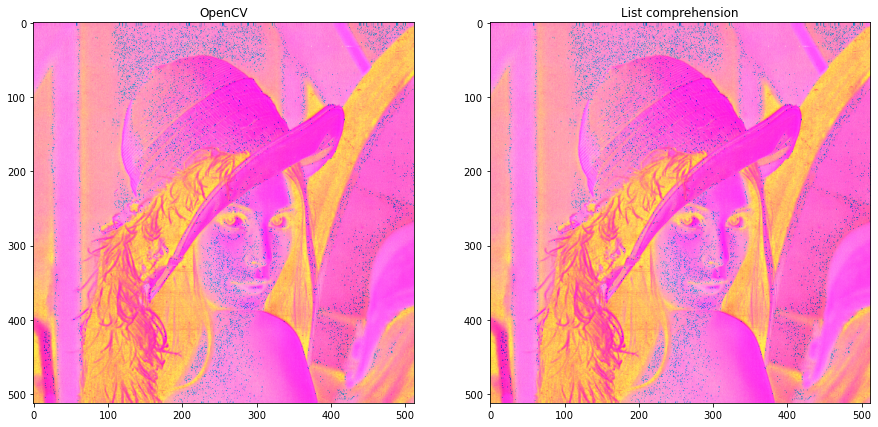

In [17]:
hsv1 = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
hsv2 = rgb2hsv(img)

plt.figure(figsize=(5*3, 5*3), constrained_layout=False)
plt.subplot(1,2,1)
plt.imshow(hsv1)
plt.title('OpenCV')
plt.subplot(1,2,2)
plt.imshow(hsv2)
plt.title('List comprehension')
plt.show()

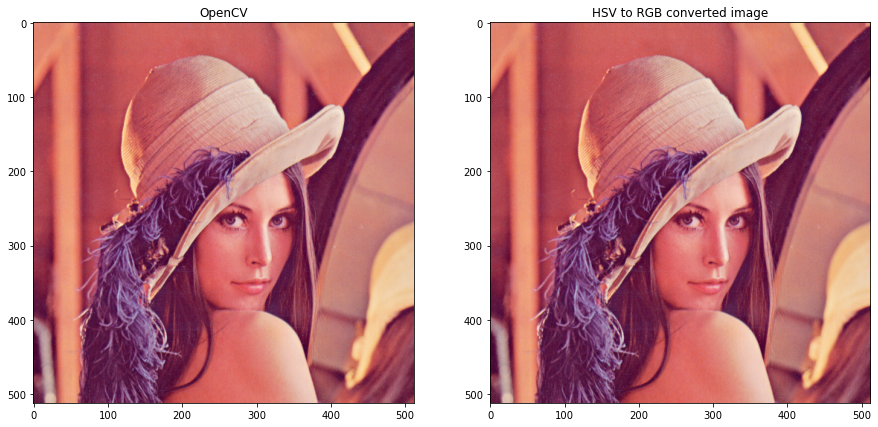

In [18]:
cv = cv2.cvtColor(hsv1, cv2.COLOR_HSV2RGB)
rgb = hsv2rgb(hsv1)
plt.figure(figsize=(5*3, 5*3), constrained_layout=False)
plt.subplot(1,2,1)
plt.imshow(cv)
plt.title('OpenCV')
plt.subplot(1,2,2)
plt.imshow(rgb)
plt.title('HSV to RGB converted image')
plt.show()